<a href="https://colab.research.google.com/github/santosrivero/EDA/blob/main/Data_Science_Week_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

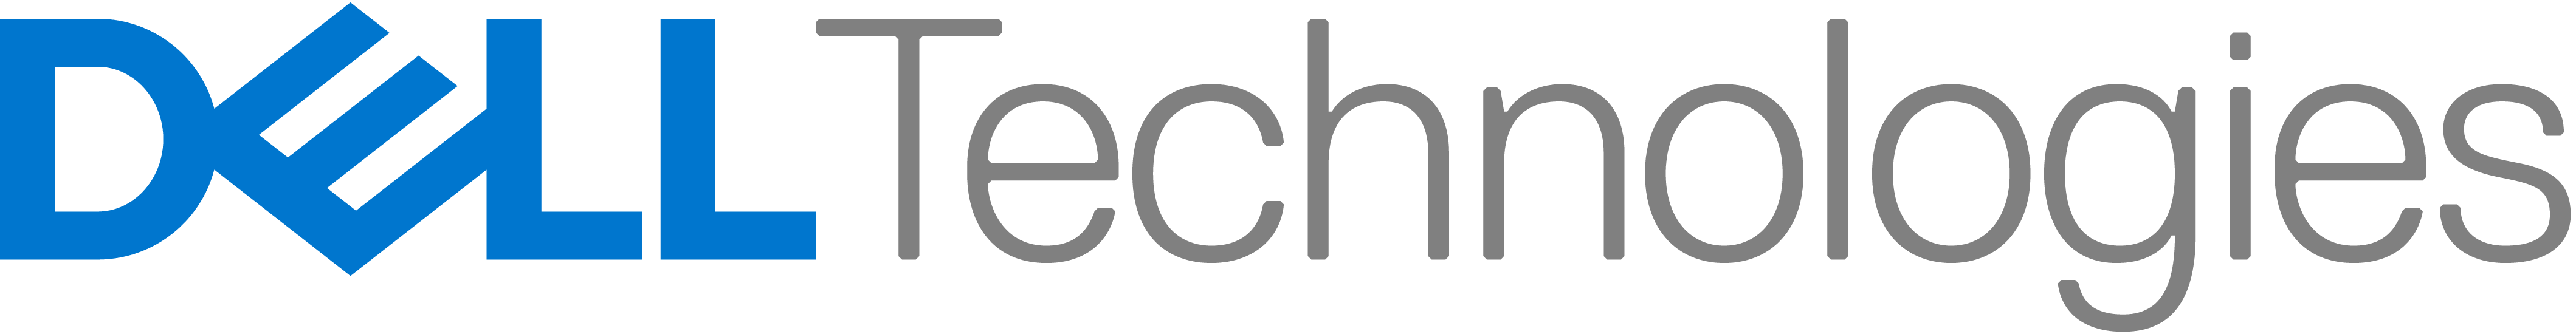
#Análisis Exploratorio de Datos con Python
Presentado por: Ing. Santos Rivero

Data Science Week - 20 de abril de 2021

Enlaces:

1.  https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations

2.  https://github.com/owid/covid-19-data/blob/master/scripts/input/un/population_2020.csv

3.  https://github.com/owid/covid-19-data/issues/333#issuecomment-763015298

4.  https://www.laestrella.com.pa/nacional/210413/panama-supera-medio-millon-dosis-vacunas-aplicadas-covid


Breve descripción de las columnas proporcionadas por Our World In Data.

1.   location: nombre del país o región dentro de un país
2.   iso_code: código del país (3 letras)
3.   date: fecha de la observación o registro
4.   total_vaccinations: número de dosis administradas
5.   daily_vaccinations_raw: cambio diario en el total de dosis administradas
6.   daily_vaccinations: nuevas dosis administradas por día (promedio calculado)
7.   people_vaccinated: número total de personas vacunadas (por lo menos una dosis aplicada)
8.   people_fully_vaccinated: número total de personas que han recibido todas las dosis de acuerdo al protocolo de vacunación

In [ ]:
# Importar librerías de Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Extraeremos nuestros conjuntos de datos
population = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/scripts/input/un/population_2020.csv', index_col=0)
data = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv', index_col=0)

In [ ]:
# Exploremos las primeras filas del conjunto de datos "population"
print(population.head())
print(population.shape)

In [ ]:
# Exploremos los registros vacios
print("\nCantidad de registros vacios:\n{}".format(population.isnull().sum()))

print(population[population['iso_code'].isnull()])

In [ ]:
# Colocamos el indice como columna y eliminamos columna
population.reset_index(inplace=True)
population.dropna(inplace=True)

In [ ]:
# Este es el conjunto de datos sin filas vacias
print(population)

In [ ]:
# Mostrar poblacion de Panama
population_pty = population['population'][population['entity']=='Panama'].sum()
print("\nPoblacion de Panama: {}".format(population_pty))

In [ ]:
# El atributo shape nos indica el número de observaciones (filas) y las variables (columnas) que tenemos en nuestro conjunto de datos.
print(data.shape)
print("Nuestro set de datos tiene {} filas y {} columnas.".format(data.shape[0],data.shape[1]))

In [ ]:
# Exploremos el nombre de las columnas de nuestro archivo
data.columns

In [ ]:
# Exploremos las primeras filas
data.head()

In [ ]:
# Observamos en el paso anterior que el indice va de Afghanistan hasta Zimbawe
data.index

In [ ]:
# El indice esta basado en el nombre del pais (location)
# Con .reset_index() reiniciamos el indice de 0 en adelante y el indice anterior lo convertimos a columna con inplace=True
data.reset_index(inplace=True)

In [ ]:
# Información del conjunto de datos (nombre de columnas, tipo de datos, registros no vacíos)
data[data['location']=='Panama'].info()

In [ ]:
# Otra manera de verificar los registros vacíos (null)
data[data['location']=='Panama'].isnull().sum()

In [ ]:
# Convirtamos el campo "date" de un tipo texto a fecha
data['date'] = pd.to_datetime(data['date'],format='%Y-%m-%d')
print(data['date'].dtype)

In [ ]:
# Imprimimos las primeras filas con .head() y las ultimas filas con .tail()
# Probemos con 5, 10, 100 filas para Panama
data[data['location']=='Panama'].head()

In [ ]:
data.info()

In [ ]:
# Imprimimos la n fila con .iloc[ fila, columna]
data.iloc[1000,:]

In [ ]:
# Verifiquemos si hay filas duplicadas
duplicate = data.duplicated()
print(duplicate.sum())
data[duplicate]

In [ ]:
# El método describe nos ayuda a comprender nuestros datos numéricos (mínimo, máximo, desviación estándard, percentiles)
keep_columns = ['location','iso_code','date','total_vaccinations','daily_vaccinations','people_fully_vaccinated']

data.describe()
#data[keep_columns].describe()
data[data['location']=='Panama'].describe()


In [ ]:
data[data['location']=='Panama'].sum(axis = 0, skipna = True, numeric_only=True)

In [ ]:
location = 'Panama'

total_vacunaciones             = data['total_vaccinations'][data['location']==location].max()
total_personas_vacunadas       = data['people_vaccinated'][data['location']==location].max()
total_personas_vacunadas_full  = data['people_fully_vaccinated'][data['location']==location].max()
total_vacunaciones_diarias     = data['daily_vaccinations'][data['location']==location].sum()

print("Total de vacunaciones en {}: {:.0f}".format(location,total_vacunaciones))
print("Total de personas vacunadas: {:.0f}".format(total_personas_vacunadas))
print("Total de personas vacunadas (dosis completa): {:.0f}".format(total_personas_vacunadas_full))
print("Total de vacunaciones diarias: {:.0f}".format(total_vacunaciones_diarias))
print("Diferencia en vacunaciones: {:.0f}".format(total_vacunaciones_diarias - total_vacunaciones))
print("Ratio vacunadas {:.3f}".format(total_personas_vacunadas/total_personas_vacunadas_full))

In [ ]:
#Boxplot
data[data['location']==location].boxplot(column='daily_vaccinations')

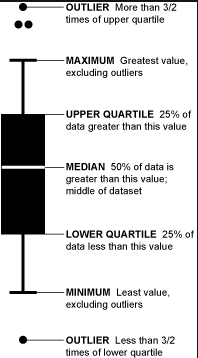

In [ ]:
# Histograma de vacunaciones diarias
data[data['location']==location].hist(column=['daily_vaccinations_raw','daily_vaccinations'],bins=10,sharey=True)

In [ ]:
# Histograma de personas vacunadas
data[data['location']==location].hist(column=['people_vaccinated','people_fully_vaccinated'],bins=10,sharey=True)

In [ ]:
# Histogramas
data[data['location']==location].hist(figsize=(16,20), bins=10, xlabelsize=8, ylabelsize=8)

In [ ]:
# Gráfico de densidad
plt.figure(figsize=(9,8))
sns.distplot(data[data['location']==location]['daily_vaccinations'], color='b', bins=10, hist_kws={'alpha':0.4})

In [ ]:
#Correlación entre variables
data.corr()

In [ ]:
# Correlación entre variables
corr = data.corr()
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={'size': 8}, square=True)

In [ ]:
# Identificar alta correlación para una variable en específico
variable_busqueda = 'daily_vaccinations'
df_corr = data.corr()[variable_busqueda][:-1]
golden_features_list = df_corr[abs(df_corr)>0.5].sort_values(ascending=False)
print("Existen {} variables con alta correlacion positiva con {}:\n{}".format(len(golden_features_list),variable_busqueda,golden_features_list))

#Análisis de dos variables

1. Numérico vs Numérico
* Scatterplot
* Lineal
* Mapa de calor por correlación


2. Categórico vs Numérico
* Barra
* Violín
* Boxplot categórico
* Swarm


3. Categórico vs Categórico
* Barra
* Barra (agrupado)
* Point

# Otros métodos a considerar en EDA
A menudo encontramos datos que están en diferentes escalas (millones, miles, decenas) por lo que es difícil comparar estas variables.

Al normalizar los datos estandarizamos el rango de los datos (escala). Por ejemplo, StandardScaler de sklearn normaliza la data usando la desviación estándard de cada campo.

Para las variables categóricas, podemos crear variables binarias (1 ó 0) dummy para representar la presencia o ausencia de la categoría. Por ejemplo, si el registro es "Panama", entonces 1. De lo contrario, 0.

In [ ]:
# Gráfica lineal
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot()
sns.lineplot( x = 'date', y = 'daily_vaccinations', hue = 'location', data = data[data['location']==location])
plt.legend(ncol = 3, frameon = False, title = 'País')
plt.xticks(rotation=45) 
plt.title('Vacunaciones en {}'.format(location))

In [ ]:
# Gráfica lineal
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot()
sns.lineplot( x = 'date', y = 'total_vaccinations', hue = 'location', data = data[data['location']==location])
plt.legend(ncol = 3, frameon = False, title = 'País')
plt.xticks(rotation=45) 
plt.title('Vacunaciones en {}'.format(location))

In [ ]:
# Gráfica lineal (dos gráficos horizontales)
fig, axes = plt.subplots(1, 2, figsize=(18, 5), sharey=False)
fig.suptitle('Vacunaciones en {}'.format(location))
sns.lineplot(ax=axes[0], x = 'date', y = 'total_vaccinations', hue = 'location', data = data[data['location']==location]).set_title('Total de Vacunaciones')
sns.lineplot(ax=axes[1], x = 'date', y = 'daily_vaccinations', hue = 'location', data = data[data['location']==location]).set_title('Vacunaciones Diarias') 


In [ ]:
# Gráfica lineal (dos gráficos verticales)
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharey=False)
fig.suptitle('Vacunaciones en {}'.format(location))
sns.lineplot(ax=axes[0], x = 'date', y = 'total_vaccinations', hue = 'location', data = data[data['location']==location]).set_title('Total de Vacunaciones')
sns.lineplot(ax=axes[1], x = 'date', y = 'daily_vaccinations', hue = 'location', data = data[data['location']==location]).set_title('Vacunaciones Diarias') 
